In [56]:
import csv
from cqs.object import Instance
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.random import random_circuit
import qiskit.qasm3 as qasm3
from instances_b.reader_b import read_csv_b
from examples.benchmark.cqs_main import main_prober, main_solver
from tqdm import tqdm
from cqs.local.calculation import calculate_Q_r
from cqs.optimization import solve_combination_parameters
from matplotlib import pyplot as plt
import torch
import numpy as np
import pandas as pd
import numpy as np
import re


In [2]:
def normalize_quantum_state(vec):
    norm=np.sqrt(np.abs(vec.T.conjugate()@vec))
    return vec/norm

def __num_to_pauli_list(num_list):
    paulis = ['I', 'X', 'Y', 'Z']
    pauli_list = [paulis[int(i)] for i in num_list]
    return pauli_list

def __add_Pauli_gate(qc, which_qubit, which_gate):
    if which_gate == 0:
        qc.id(which_qubit)
    elif which_gate == 1:
        qc.x(which_qubit)
    elif which_gate == 2:
        qc.y(which_qubit)
    elif which_gate == 3:
        qc.z(which_qubit)
    else:
        return ValueError("Not supported Pauli gate type.")

def __num_to_pauli_circuit(num_list):
    n = len(num_list)
    num_list = [int(i) for i in num_list]
    qr = QuantumRegister(n, 'q')
    qc = QuantumCircuit(qr)
    for i in range(n):
        __add_Pauli_gate(qc, i, num_list[i])
    return qc

def create_random_circuit_in_native_gate(n, d):
    ub = random_circuit(num_qubits=n,max_operands=2, depth=d, measure=False)
    # ub = transpile_circuit(ub, device='Aria', optimization_level=2)
    return ub

# True loss

In [4]:
with open('../../../../examples/benchmark/pauli u, random b/3_qubit_data_generation_matrix_A.csv', 'r', newline='') as csvfile:
    data_b = read_csv_b(3)
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    losses_noiseless=[]
    for i, row in enumerate(reader):
        if 2 > i > 0:
            row_clean = [j for j in ''.join(row).split('"') if j != ',']
            nLc = row_clean[0].split(',')
            n = int(nLc[0])
            print("qubit number is:", n)
            L = int(nLc[1])
            print("term number is:", L)
            kappa = float(nLc[2])
            print('condition number is', kappa)
            pauli_strings = [__num_to_pauli_list(l) for l in eval(row_clean[1])]
            print('Pauli strings are:', pauli_strings)
            pauli_circuits = [__num_to_pauli_circuit(l) for l in eval(row_clean[1])]
            coeffs = [float(i) for i in eval(row_clean[2])]
            print('coefficients are:', coeffs)
            print()

            # circuit depth d
            d = 3
            ub = qasm3.loads(data_b.iloc[i].qasm)
            print('Ub is given by:', data_b.iloc[i].b)
            print(ub)

            # generate instance
            instance = Instance(n, L, kappa)
            instance.generate(given_coeffs=coeffs, given_unitaries=pauli_circuits, given_ub=ub)
            Itr, LOSS, ansatz_tree = main_prober(instance, backend='qiskit-noiseless',ITR=None,
                                    shots=0, optimization_level=2,
                                    noise_level_two_qubit=0, noise_level_one_qubit=0, readout_error=0)
            print(Itr)
            print(LOSS)
            losses_noiseless+=[LOSS]
            print('ANsatz tree contains:')
            # for qc in ansatz_tree:
            #     print(qc)
ansatz_tree=[ansatz_tree[i] for i in range(len(ansatz_tree)-1)]

Resolved file path: C:\Users\Nikita\PycharmProjects\CQS_singapore\instances_b\3_b_random_circuits.csv
Reading file: C:\Users\Nikita\PycharmProjects\CQS_singapore\instances_b\3_b_random_circuits.csv
qubit number is: 3
term number is: 3
condition number is 3.5456037521362305
Pauli strings are: [['Y', 'Z', 'Y'], ['I', 'Y', 'Y'], ['X', 'Y', 'I']]
coefficients are: [-1.01, 1.17, 2.76]

Ub is given by: [(0.7071067811865475+0j), 0j, 0j, 0j, (-0.6099094210942649+0.357785547584665j), 0j, 0j, 0j]
                                           
q_0: ──────────X───────────■───────■───────
               │           │ ┌─────┴──────┐
q_1: ──────────X───────────■─┤ Rz(4.3897) ├
     ┌───────────────────┐   └────────────┘
q_2: ┤ U2(2.6111,5.8783) ├─────────────────
     └───────────────────┘                 


Hadamard tests q Progress: 100%|██████████| 3/3 [00:00<00:00, 12.29it/s]
C:\Users\Nikita\PycharmProjects\CQS_singapore\cqs\optimization.py:91: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:3729.)
  return torch.abs(0.5*torch.matmul(x.T, torch.matmul(Q, x)) + torch.matmul(r.T, x) + 1)


loss: 1.0
combination parameters are: [(8.875938519884146e-19+1.3312335411085762e-43j)]


Hadamard tests q Progress: 100%|██████████| 6/6 [00:00<00:00, 12.56it/s]


loss: 0.23874246416144873
combination parameters are: [(2.020010211030527e-18+1.2240698941079121e-17j), (0.27581796050071716-3.062195165274972e-17j)]


Hadamard tests q Progress: 100%|██████████| 9/9 [00:00<00:00, 14.06it/s]


loss: 0.04036166897400428
combination parameters are: [(1.0263121854701646e-17-0.09446866065263748j), (0.2758179008960724-4.2345089474818697e-17j), (5.660834344808286e-17-0.16955626010894775j)]


Hadamard tests q Progress: 100%|██████████| 12/12 [00:01<00:00, 10.22it/s]


loss: 6.770145932755156e-08
combination parameters are: [(5.439448003130565e-08-0.09446913748979568j), (0.31842896342277527+6.167498156628426e-08j), (-2.9401084233882102e-08-0.16955654323101044j), (0.0764799490571022+8.233141812752365e-08j)]
[1, 2, 3, 4]
[1.0, 0.23874246416144873, 0.04036166897400428, 6.770145932755156e-08]
ANsatz tree contains:


In [5]:
Q_true,r_true=calculate_Q_r(instance,ansatz_tree, backend='qiskit-noiseless',ITR=None,
                                    shots=0, optimization_level=2,
                                    noise_level_two_qubit=0, noise_level_one_qubit=0, readout_error=0)

Hadamard tests q Progress: 100%|██████████| 12/12 [00:01<00:00,  7.58it/s]


In [34]:
def find_true_loss_function(alphas,Q=Q_true,r=r_true):
    x=np.vstack((np.real(alphas),np.imag(alphas))).reshape(-1,1)
    depth=len(alphas)-1
    # Define the four sectors (quadrants)
    q1 = Q[:depth+1, :depth+1]
    q2 = Q[:depth+1, 4:4+depth+1]
    q3 = Q[4:4+depth+1, :depth+1]
    q4 = Q[4:4+depth+1, 4:4+depth+1]
    
    # Stack them back together
    top = np.hstack((q1, q2))
    bottom = np.hstack((q3, q4))
    Q1 = np.vstack((top, bottom))
    
    r1=r[:depth+1]
    r2=r[4:4+depth+1]
    
    r1=np.vstack((r1,r2)).reshape(-1,1)
    xt=torch.Tensor(x)
    Qt=torch.Tensor(Q1)*2
    rt=torch.Tensor(r1)*(-2)
    return (0.5*torch.matmul(xt.T, torch.matmul(Qt, xt))+ torch.matmul(rt.T, xt) + 1).item()

# Hardware

100%|██████████| 4/4 [00:07<00:00,  1.97s/it]


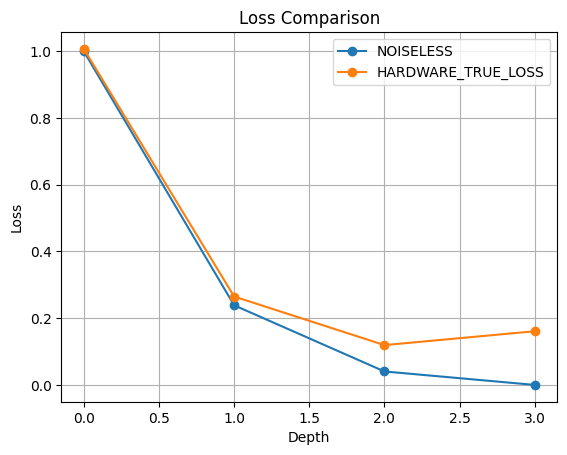

In [38]:
dataQ=np.array(pd.read_csv(
    "ionq aria/hardware_result_Q.csv"))
datar=np.array(pd.read_csv(
    "ionq aria/hardware_result_r.csv"))
losses = []
alphas = []
losses_hardware_to_noiseless=[]
for depth in tqdm(range(4)):
    # Define the four sectors (quadrants)
    q1 = dataQ[:depth+1, :depth+1]
    q2 = dataQ[:depth+1, 4:4+depth+1]
    q3 = dataQ[4:4+depth+1, :depth+1]
    q4 = dataQ[4:4+depth+1, 4:4+depth+1]
    
    # Stack them back together
    top = np.hstack((q1, q2))
    bottom = np.hstack((q3, q4))
    Q = np.vstack((top, bottom))
    
    r1=datar[:depth+1]
    r2=datar[4:4+depth+1]
    
    r=np.vstack((r1,r2))
    
    loss, alpha = solve_combination_parameters(Q, r, which_opt='ADAM')
    losses+=[loss]
    alphas+=[alpha]
    
    losses_hardware_to_noiseless+=[find_true_loss_function(alpha)]
    
    
plt.plot(losses_noiseless[0], "-o", label="NOISELESS")
# plt.plot(losses, "-o", label=f"Losses HARDWARE")
plt.plot(losses_hardware_to_noiseless, "-o", label="HARDWARE_TRUE_LOSS")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.grid(True)
plt.show()
    

100%|██████████| 4/4 [00:10<00:00,  2.62s/it]


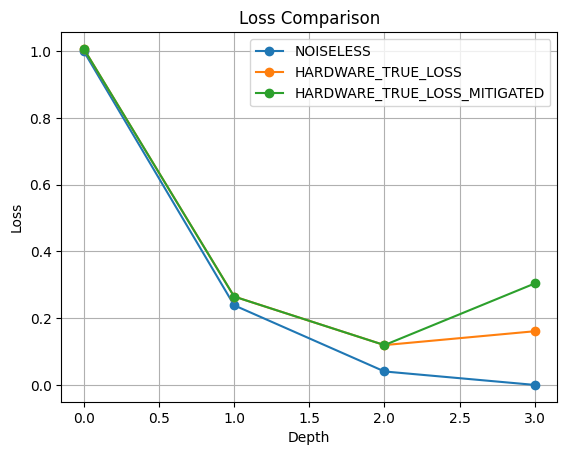

In [39]:
dataQ_mitigated=np.array(pd.read_csv(
    "ionq aria/hardware_result_Q_mitigated.csv"))
datar_mitigated=np.array(pd.read_csv(
    "ionq aria/hardware_result_r_mitigated.csv"))
losses_mitigated = []
alphas_mitigated = []
losses_hardware_to_noiseless_mitigated=[]
for depth in tqdm(range(4)):
    # Define the four sectors (quadrants)
    q1 = dataQ_mitigated[:depth+1, :depth+1]
    q2 = dataQ_mitigated[:depth+1, 4:4+depth+1]
    q3 = dataQ_mitigated[4:4+depth+1, :depth+1]
    q4 = dataQ_mitigated[4:4+depth+1, 4:4+depth+1]
    
    # Stack them back together
    top = np.hstack((q1, q2))
    bottom = np.hstack((q3, q4))
    Q = np.vstack((top, bottom))
    
    r1=datar_mitigated[:depth+1]
    r2=datar_mitigated[4:4+depth+1]
    
    r=np.vstack((r1,r2))
    
    loss, alpha = solve_combination_parameters(Q, r, which_opt='ADAM')
    losses_mitigated+=[loss]
    alphas_mitigated+=[alpha]
    
    losses_hardware_to_noiseless_mitigated+=[find_true_loss_function(alpha)]
    
    
plt.plot(losses_noiseless[0], "-o", label="NOISELESS")
plt.plot(losses_hardware_to_noiseless, "-o", label="HARDWARE_TRUE_LOSS")
plt.plot(losses_hardware_to_noiseless_mitigated, "-o", label="HARDWARE_TRUE_LOSS_MITIGATED")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.grid(True)
plt.show()
    

In [66]:
loss_data[0]

,Depth,Losses,Losses_Noisy,Alphas
0,0,1.000000e+00,9.985508e-01,(0.007759350351989269-0.009324087761342525j)
1,1,2.387425e-01,2.524355e-01,(-0.007452200632542372+0.0007641937118023634j)...
2,2,4.036167e-02,2.054449e-07,(0.02296782098710537-0.04027821868658066j)|(0....
3,3,6.781818e-08,3.918330e-07,(0.026866313070058823-0.2603597640991211j)|(0....


In [107]:
loss_data=[]
loss_data+=[pd.read_csv("noisy simulation/loss_data_1.csv")]
loss_data+=[pd.read_csv("noisy simulation/loss_data_5.csv")]
loss_data+=[pd.read_csv("noisy simulation/loss_data_10.csv")]
loss_data+=[pd.read_csv("noisy simulation/loss_data_14.csv")]
loss_data+=[pd.read_csv("noisy simulation/loss_data_20.csv")]
# Function to clean and convert complex numbers from a string
def parse_complex_string(s):
    # Split by '|', remove parentheses, and convert each part to a complex number
    return [complex(re.sub(r'[()]', '', part)) for part in s.split('|')]

# Iterate over all elements in loss_data
for i in range(len(loss_data)):
    loss_data[i]['Alphas'] = loss_data[i]['Alphas'].apply(lambda x: parse_complex_string(x))
    True_loss=[]
    for depth in range(len(loss_data[i])):
        True_loss+=[find_true_loss_function(np.array(loss_data[i]['Alphas'][depth]))]
    loss_data[i]["True_loss"]=True_loss
# Check the modified data
print(loss_data[0])

   Depth        Losses  Losses_Noisy  \
0      0  1.000000e+00  9.985508e-01   
1      1  2.387425e-01  2.524355e-01   
2      2  4.036167e-02  2.054449e-07   
3      3  6.781818e-08  3.918330e-07   

                                              Alphas  True_loss  
0     [(0.007759350351989269-0.009324087761342525j)]   1.001472  
1  [(-0.007452200632542372+0.0007641937118023634j...   0.239672  
2  [(0.02296782098710537-0.04027821868658066j), (...   0.084372  
3  [(0.026866313070058823-0.2603597640991211j), (...   0.282600  


In [111]:
ALL_data_frame=pd.DataFrame()
ALL_data_frame["Noiseless"]=losses_noiseless[0]
ALL_data_frame["Hardware_train"]=losses
ALL_data_frame["Hardware_perform"]=losses_hardware_to_noiseless
# ALL_data_frame["noisy_simulation_1_train"]=loss_data[0].Losses
# ALL_data_frame["noisy_simulation_1_perform"]=loss_data[0].True_loss
ALL_data_frame["noisy_simulation_5_train"]=loss_data[1].Losses
ALL_data_frame["noisy_simulation_5_perform"]=loss_data[1].True_loss
ALL_data_frame["noisy_simulation_10_train"]=loss_data[2].Losses
ALL_data_frame["noisy_simulation_10_perform"]=loss_data[2].True_loss
ALL_data_frame["noisy_simulation_14_train"]=loss_data[3].Losses
ALL_data_frame["noisy_simulation_14_perform"]=loss_data[3].True_loss
# ALL_data_frame["noisy_simulation_20_train"]=loss_data[4].Losses
# ALL_data_frame["noisy_simulation_20_perform"]=loss_data[4].True_loss

In [113]:
ALL_data_frame.to_csv("ALL_data_frame.csv")

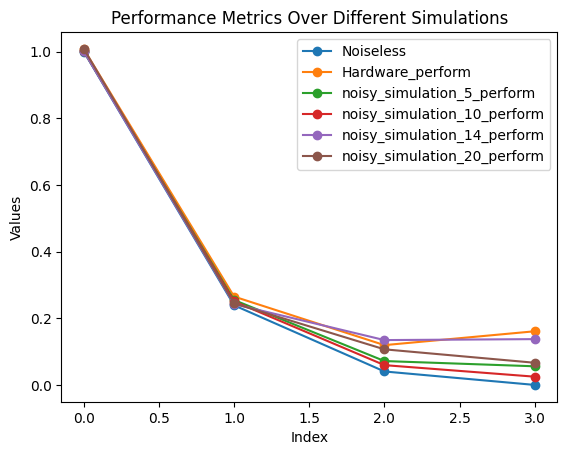

In [110]:
# Plot all columns
plt.plot(ALL_data_frame, "-o")

# Add a legend using the column names
plt.legend(ALL_data_frame.columns, loc="best")

# Add labels and title (optional for better readability)
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Performance Metrics Over Different Simulations")

# Show the plot
plt.show()


0.986